In [117]:
import pandas as pd
import numpy as np

#visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pyecharts

#pre-processing
import missingno as msno

## Data import

In [28]:
data = pd.read_csv('../data.csv', index_col=0)

In [115]:
#data.tail(20)

Pre-processing: null value

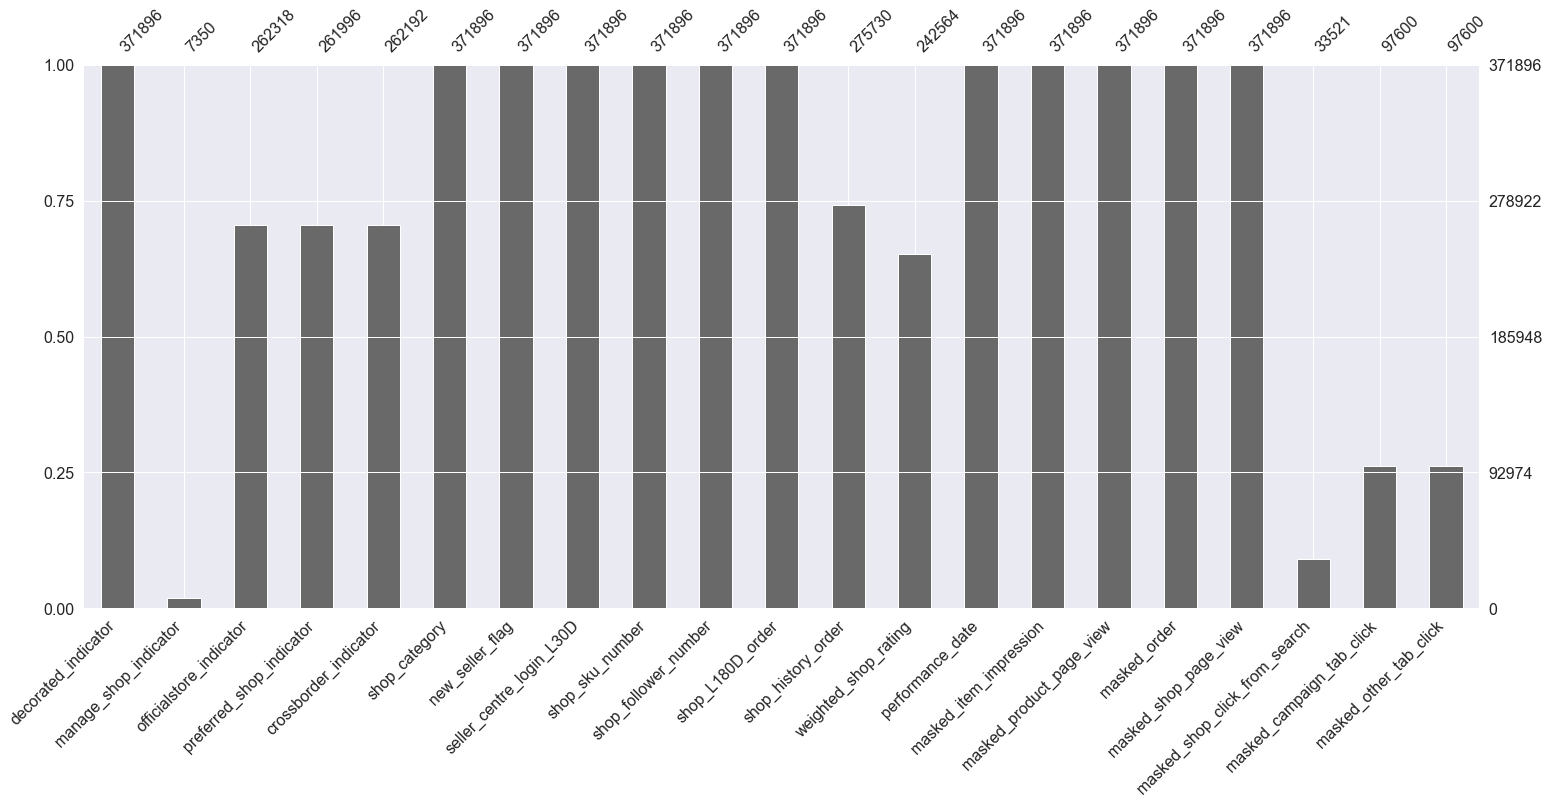

In [120]:
msno.bar(data)

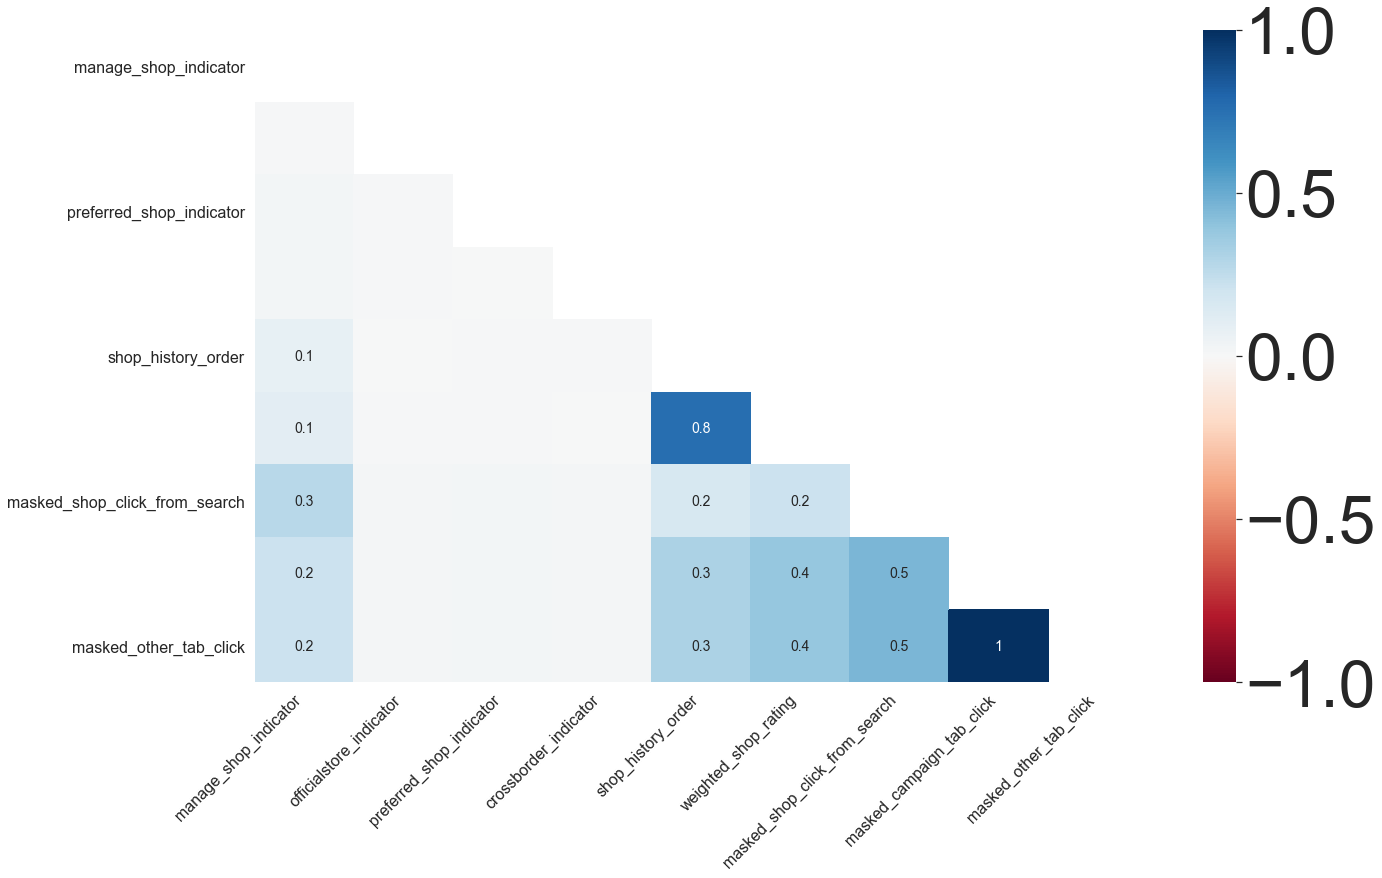

In [121]:
msno.heatmap(data)
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Feature Engineering 
- transfer text value into number

In [33]:
data['decorated_indicator'] = np.where(data['decorated_indicator']== 'N', 0, 1)
data['new_seller_flag'] = np.where(data['new_seller_flag']== 'old_seller', 0, 1)

In [29]:
data['shop_category'] = np.where(data['shop_category']== 'Home & Living', 0, 
                                 np.where(data['shop_category']== 'Hobbies & Stationery', 1, 
                                np.where(data['shop_category']== 'Men\'s Bags & Accessories', 2,
                                np.where(data['shop_category']== 'Toys, Games & Collectibles', 3, 
                                np.where(data['shop_category']== 'Motors', 4,
                                np.where(data['shop_category']== 'Makeup & Fragrances', 5, 
                                np.where(data['shop_category']== 'Health & Personal Care', 6, 
                                np.where(data['shop_category']== 'Men\'s Apparel', 7, 
                                np.where(data['shop_category']== 'Women\'s Apparel', 8, 
                                np.where(data['shop_category']== 'Babies & Kids', 9, 
                                np.where(data['shop_category']== 'Home Appliances', 10, 
                                np.where(data['shop_category']== 'Pet Care', 11,
                                np.where(data['shop_category']== 'Home Entertainment', 12, 
                                np.where(data['shop_category']== 'Mobile Accessories', 13, 
                                np.where(data['shop_category']== 'Women\'s Bags', 14, 
                                np.where(data['shop_category']== 'Sports & Travel', 15, 
                                np.where(data['shop_category']== 'Women Shoes', 16, 
                                np.where(data['shop_category']== 'Mobiles & Gadgets', 17, 
                                np.where(data['shop_category']== 'Cameras', 18, 
                                np.where(data['shop_category']== 'Gaming', 19, 
                                ''))))))))))))))))))))

## Dataset splitting

In [38]:
whitelist = data[data['decorated_indicator'] == 1]
non_whitelist = data[data['decorated_indicator'] == 0]

## EDA

In [108]:
from pyecharts import options as opts
from pyecharts.charts import Pie
from pyecharts.faker import Faker

c = (
    Pie()#init_opts=opts.InitOpts(width="300px", height="300px")
    .add("",[list(z) for z in zip(['non-whitelist','whitelist'],data.decorated_indicator.value_counts()/14)])
    #.set_colors(["green",  "orange"])
    .set_global_opts(
        title_opts=opts.TitleOpts(title="Distribution of Shops Type (no.of shops)"),
        legend_opts=opts.LegendOpts(pos_right="15%"))
    
    .set_series_opts(label_opts=opts.LabelOpts(formatter="{b}: {d}% ({c})")) #a: index b: value c: number d: percent
    
)
c.render_notebook()

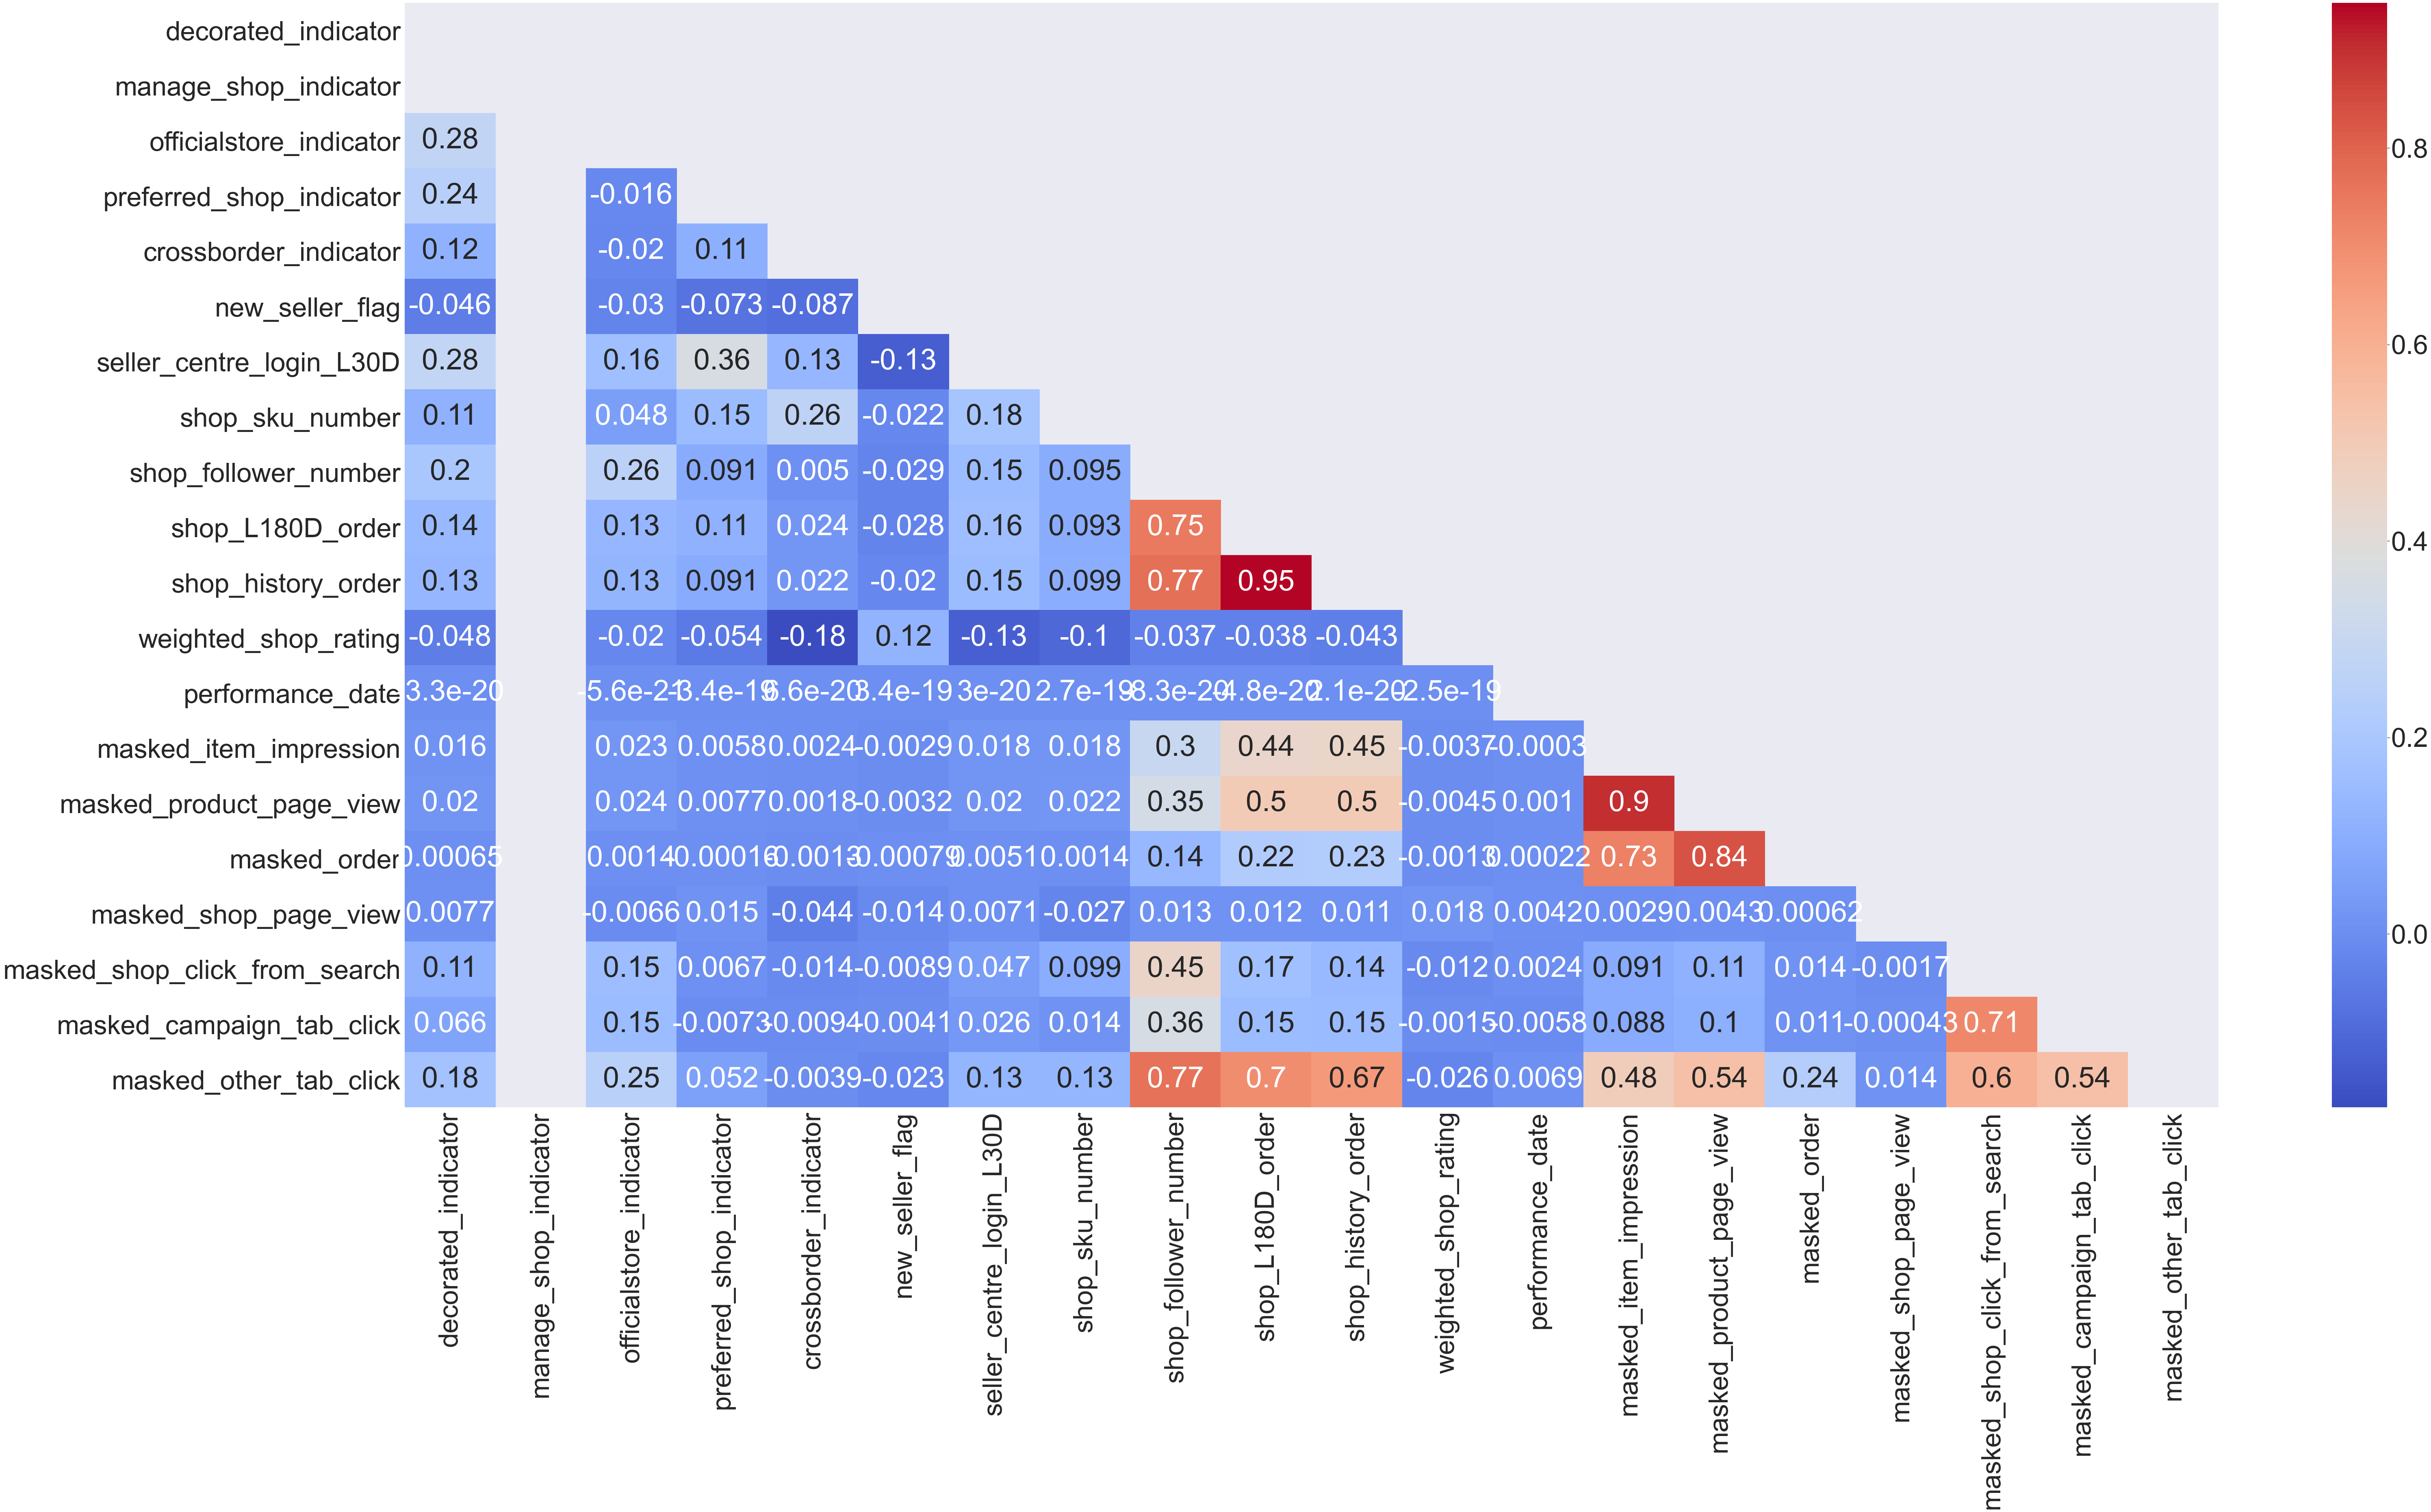

In [114]:
#Correlation Matrix
sns.set(font_scale=6)
plt.figure(figsize=(100,50))
corr = data.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='coolwarm', mask=matrix)
#corr

In [111]:
corr_features = []
corr_matrix = data.corr()

for i in range(len(corr_matrix.columns)):
  for j in range(i):
    if abs(corr_matrix.iloc[i, j]) > 0.8:
      corr_features.append((corr_matrix.columns[i], corr_matrix.columns[j]))

corr_features

[('shop_history_order', 'shop_L180D_order'),
 ('masked_product_page_view', 'masked_item_impression'),
 ('masked_order', 'masked_product_page_view')]